# Обработка данных

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data/data.csv')
df.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    300000 non-null  int64  
 1   Brand                 290295 non-null  object 
 2   Material              291653 non-null  object 
 3   Size                  293405 non-null  object 
 4   Compartments          300000 non-null  float64
 5   Laptop Compartment    292556 non-null  object 
 6   Waterproof            292950 non-null  object 
 7   Style                 292030 non-null  object 
 8   Color                 290050 non-null  object 
 9   Weight Capacity (kg)  299862 non-null  float64
 10  Price                 300000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 25.2+ MB


In [5]:
df.isna().sum()

id                         0
Brand                   9705
Material                8347
Size                    6595
Compartments               0
Laptop Compartment      7444
Waterproof              7050
Style                   7970
Color                   9950
Weight Capacity (kg)     138
Price                      0
dtype: int64

In [6]:
df.drop('id', axis=1, inplace=True)
df.columns

Index(['Brand', 'Material', 'Size', 'Compartments', 'Laptop Compartment',
       'Waterproof', 'Style', 'Color', 'Weight Capacity (kg)', 'Price'],
      dtype='object')

In [7]:
cat_cols = ['Brand', 'Material', 'Size', 'Laptop Compartment', 'Waterproof', 'Style', 'Color']

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

df['Weight Capacity (kg)'] = df['Weight Capacity (kg)'].fillna(df['Weight Capacity (kg)'].median())

df.isna().sum()

Brand                   0
Material                0
Size                    0
Compartments            0
Laptop Compartment      0
Waterproof              0
Style                   0
Color                   0
Weight Capacity (kg)    0
Price                   0
dtype: int64

In [8]:
df.describe()

,Compartments,Weight Capacity (kg),Price
count,300000.000000,300000.000000,300000.000000
mean,5.443590,18.030012,81.411107
std,2.890766,6.965312,39.039340
min,1.000000,5.000000,15.000000
25%,3.000000,12.099086,47.384620
50%,5.000000,18.068614,80.956120
75%,8.000000,24.001145,115.018160
max,10.000000,30.000000,150.000000


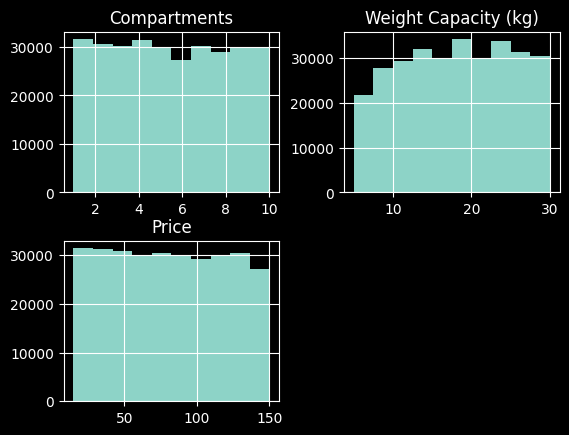

In [9]:
df.hist(bins=10)
plt.show()

In [10]:
bool_columns = ['Laptop Compartment', 'Waterproof']
one_hot_columns = ['Brand', 'Material', 'Size', 'Style', 'Color']

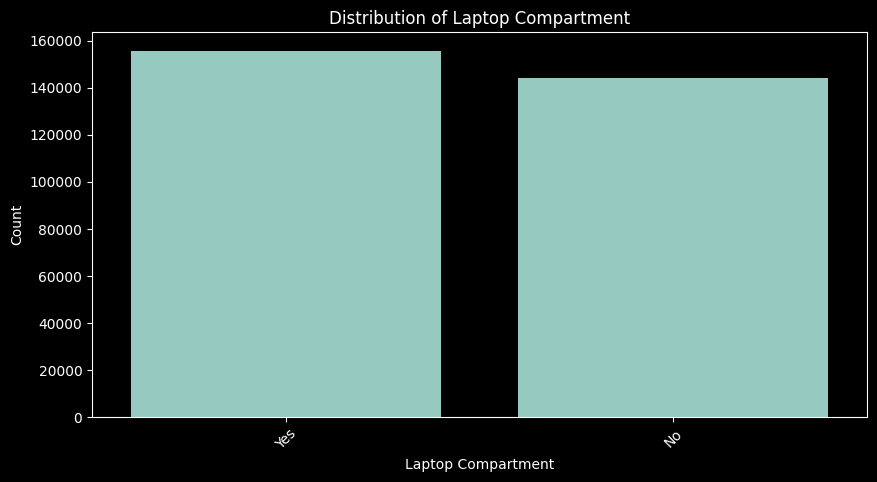

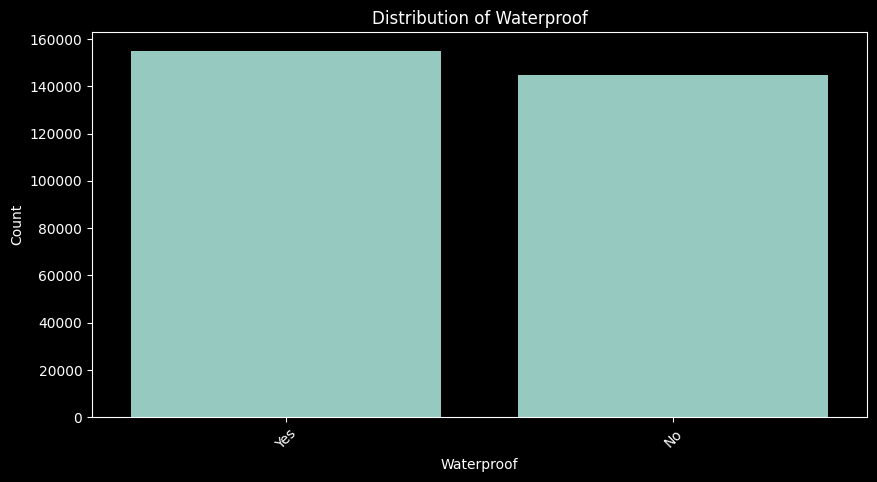

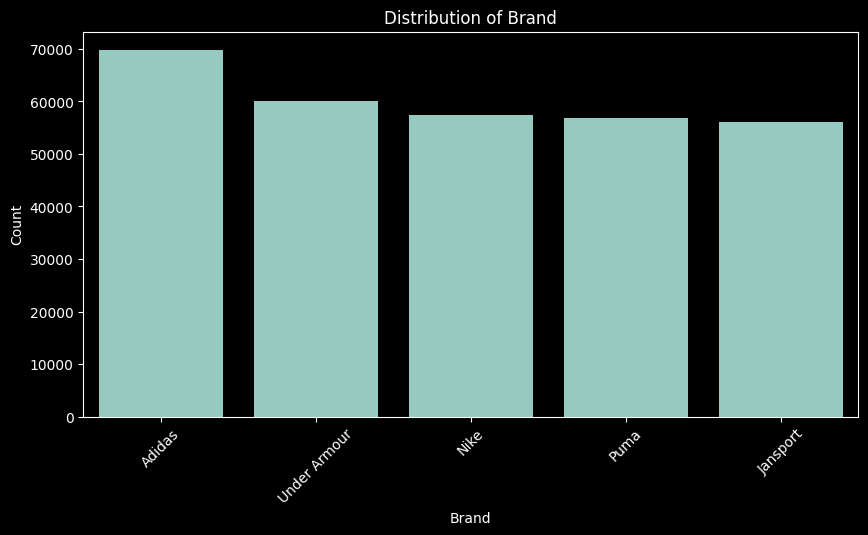

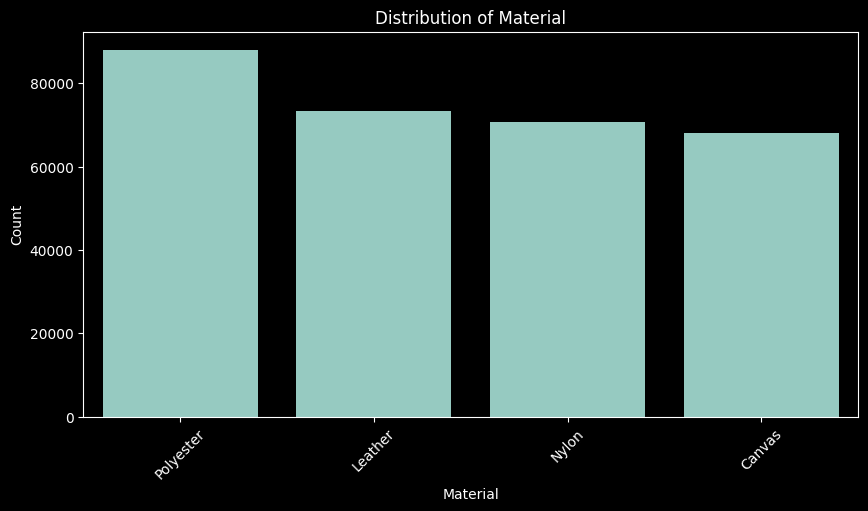

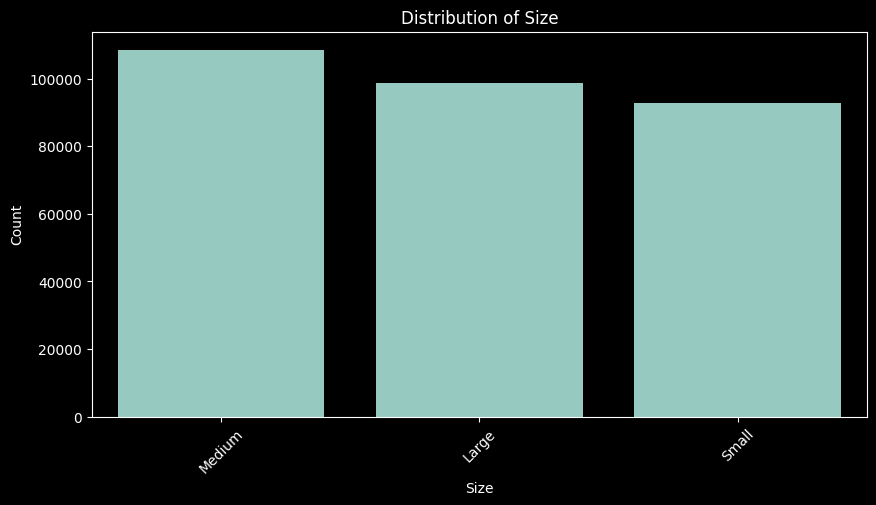

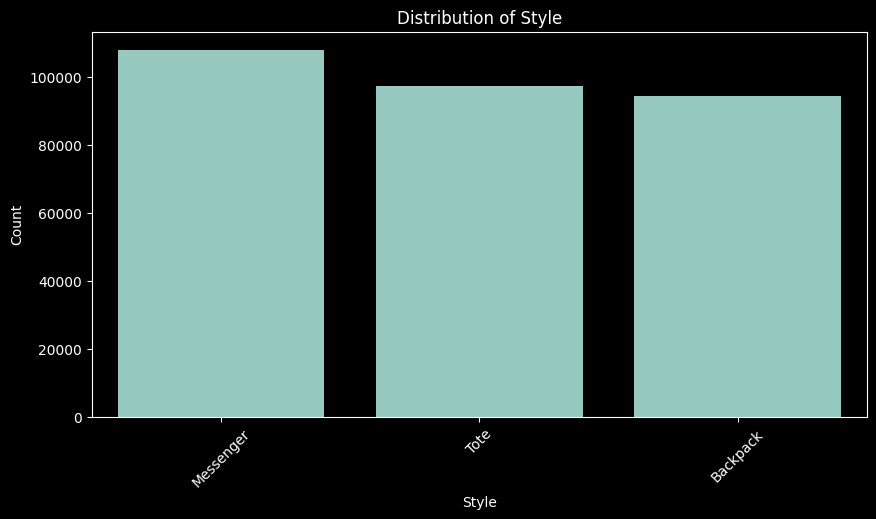

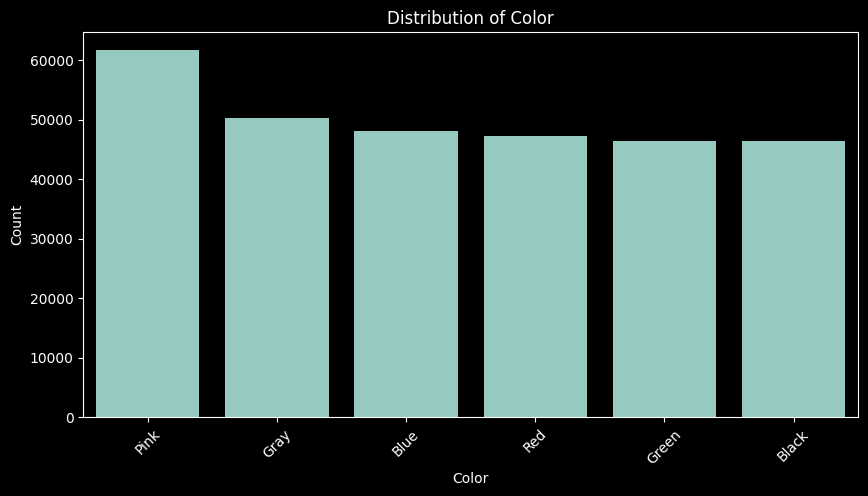

In [11]:
for col in (bool_columns + one_hot_columns):
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

In [12]:
df[bool_columns] = df[bool_columns].map(lambda x: {'yes': 1, 'no': 0}[x.lower()])

In [13]:
df = pd.get_dummies(df, columns=one_hot_columns, drop_first=True)

In [14]:
df = df.astype(np.float32)

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

cols = df.columns[df.columns != 'Price']

scaled_features = scaler.fit_transform(df[cols])
df[cols] = scaled_features

array([[<Axes: title={'center': 'Price'}>]], dtype=object)

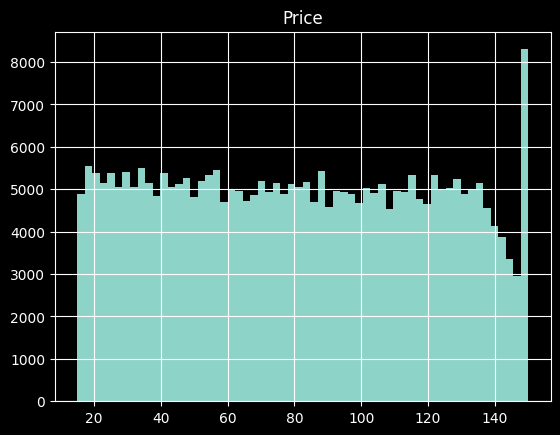

In [16]:
df[['Price']].hist(bins=60)

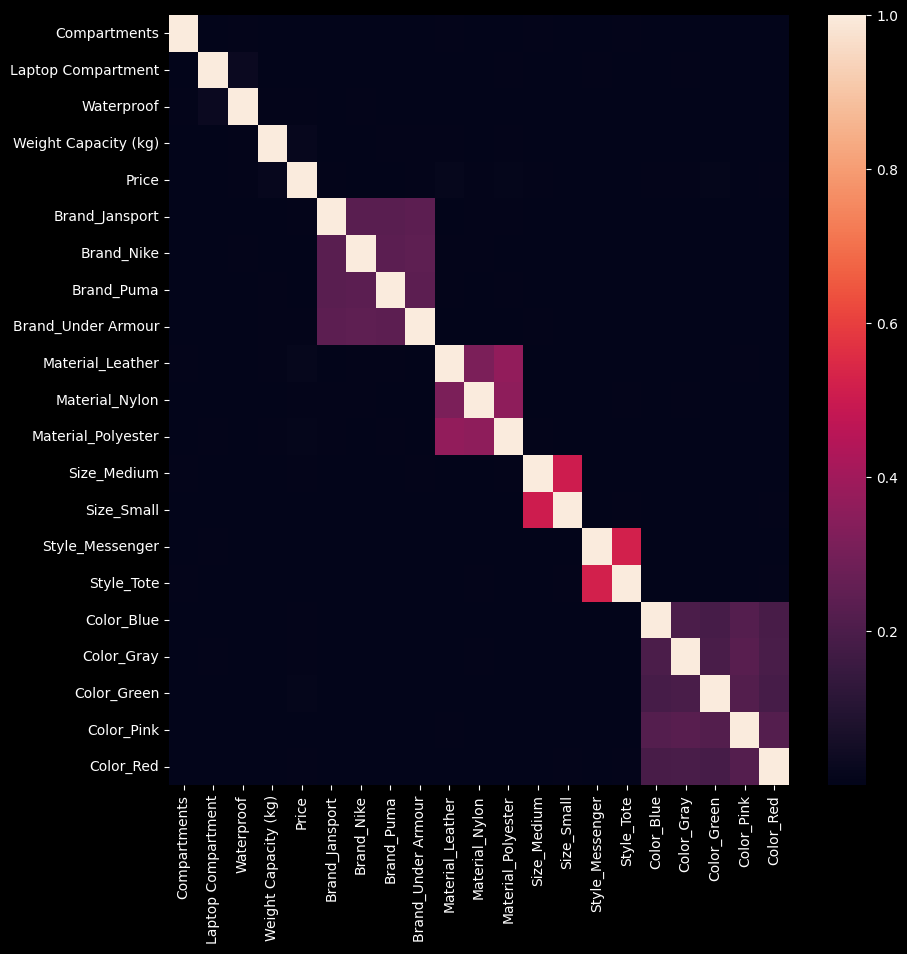

In [17]:
plt.figure(figsize=(10, 10))
sns.heatmap(np.abs(df.corr()))
plt.show()

In [18]:
df.head()

,Compartments,Laptop Compartment,Waterproof,Weight Capacity (kg),Price,Brand_Jansport,Brand_Nike,Brand_Puma,Brand_Under Armour,Material_Leather,...,Material_Polyester,Size_Medium,Size_Small,Style_Messenger,Style_Tote,Color_Blue,Color_Gray,Color_Green,Color_Pink,Color_Red
0,0.666667,1.0,0.0,0.264469,112.158752,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,1.0,1.0,0.883141,68.880562,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.111111,1.0,0.0,0.465750,39.173199,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.777778,1.0,0.0,0.317489,80.607933,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.000000,1.0,1.0,0.509974,86.023117,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [19]:
from sklearn.model_selection import train_test_split

x = df.drop('Price', axis=1)  
y = df['Price']  

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((240000, 20), (60000, 20), (240000,), (60000,))

# Обучение моделей

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

In [21]:
def evaluate_model(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

In [22]:
class InovationRegresion:
    val = None

    def fit(self, x_train, y_train):
        self.val = np.mean(y_train)

    def predict(self, x_test):
        return [self.val] * x_test.shape[0]

In [23]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "MLP Regressor": MLPRegressor(max_iter=1000), 
    "XGBoost Regressor": xgb.XGBRegressor(n_estimators=100), 
    "InovationRegresion": InovationRegresion()
}

In [24]:
results = {}
for name, model in models.items():
    mse, r2 = evaluate_model(model, x_train, y_train, x_test, y_test)
    results[name] = {'MSE': mse, 'R2': r2, 'RMSE': mse ** 0.5}

for model_name, metrics in results.items():
    print(f"{model_name} - MSE: {metrics['MSE']:.4f}, R2: {metrics['R2']:.4f}, RMSE: {(metrics['MSE'] ** 0.5):.4f}")

Linear Regression - MSE: 1514.8252, R2: 0.0012, RMSE: 38.9208
Random Forest - MSE: 1616.5944, R2: -0.0659, RMSE: 40.2069
MLP Regressor - MSE: 1517.5452, R2: -0.0006, RMSE: 38.9557
XGBoost Regressor - MSE: 1530.1377, R2: -0.0089, RMSE: 39.1170
InovationRegresion - MSE: 1516.6508, R2: -0.0000, RMSE: 38.9442


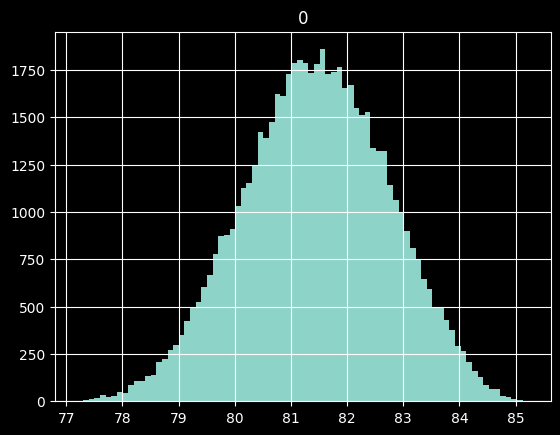

In [25]:
y_pred = models['Linear Regression'].predict(x_test)

pd.DataFrame(y_pred).hist(bins=80)
plt.plot()
plt.show()

## Пытаемся улучшить

In [26]:
df.columns

Index(['Compartments', 'Laptop Compartment', 'Waterproof',
       'Weight Capacity (kg)', 'Price', 'Brand_Jansport', 'Brand_Nike',
       'Brand_Puma', 'Brand_Under Armour', 'Material_Leather',
       'Material_Nylon', 'Material_Polyester', 'Size_Medium', 'Size_Small',
       'Style_Messenger', 'Style_Tote', 'Color_Blue', 'Color_Gray',
       'Color_Green', 'Color_Pink', 'Color_Red'],
      dtype='object')

In [27]:
for col in [
    'Compartments', 'Laptop Compartment', 'Waterproof',
    'Brand_Jansport', 'Brand_Nike',
    'Brand_Puma', 'Brand_Under Armour', 'Material_Leather', 
    'Material_Nylon', 'Material_Polyester', 'Size_Medium', 'Size_Small',
    'Style_Messenger', 'Style_Tote', 'Color_Blue', 'Color_Gray',
    'Color_Pink', 'Color_Red'
]:
    df.drop(col, axis=1, inplace=True)

In [28]:
from sklearn.model_selection import train_test_split

x = df.drop('Price', axis=1)  
y = df['Price']  

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((240000, 2), (60000, 2), (240000,), (60000,))

In [29]:
models_upd = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "MLP Regressor": MLPRegressor(max_iter=1000), 
    "XGBoost Regressor": xgb.XGBRegressor(n_estimators=100)
}

In [30]:
results = {}
for name, model in models_upd.items():
    mse, r2 = evaluate_model(model, x_train, y_train, x_test, y_test)
    results[name] = {'MSE': mse, 'R2': r2, 'RMSE': mse ** 0.5}

for model_name, metrics in results.items():
    print(f"{model_name} - MSE: {metrics['MSE']:.4f}, R2: {metrics['R2']:.4f}, RMSE: {(metrics['MSE'] ** 0.5):.4f}")

Linear Regression - MSE: 1515.8231, R2: 0.0005, RMSE: 38.9336
Random Forest - MSE: 1966.6165, R2: -0.2967, RMSE: 44.3465
MLP Regressor - MSE: 1515.7952, R2: 0.0005, RMSE: 38.9332
XGBoost Regressor - MSE: 1516.7097, R2: -0.0001, RMSE: 38.9450


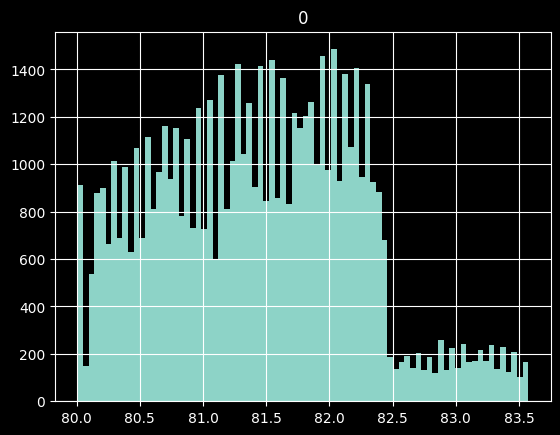

In [31]:
y_pred = models_upd['Linear Regression'].predict(x_test)

pd.DataFrame(y_pred).hist(bins=80)
plt.plot()
plt.show()